In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LOADING DATASET


In [0]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv') #linear regression using nn.

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


EXPLORATORY DATA ANALYSIS


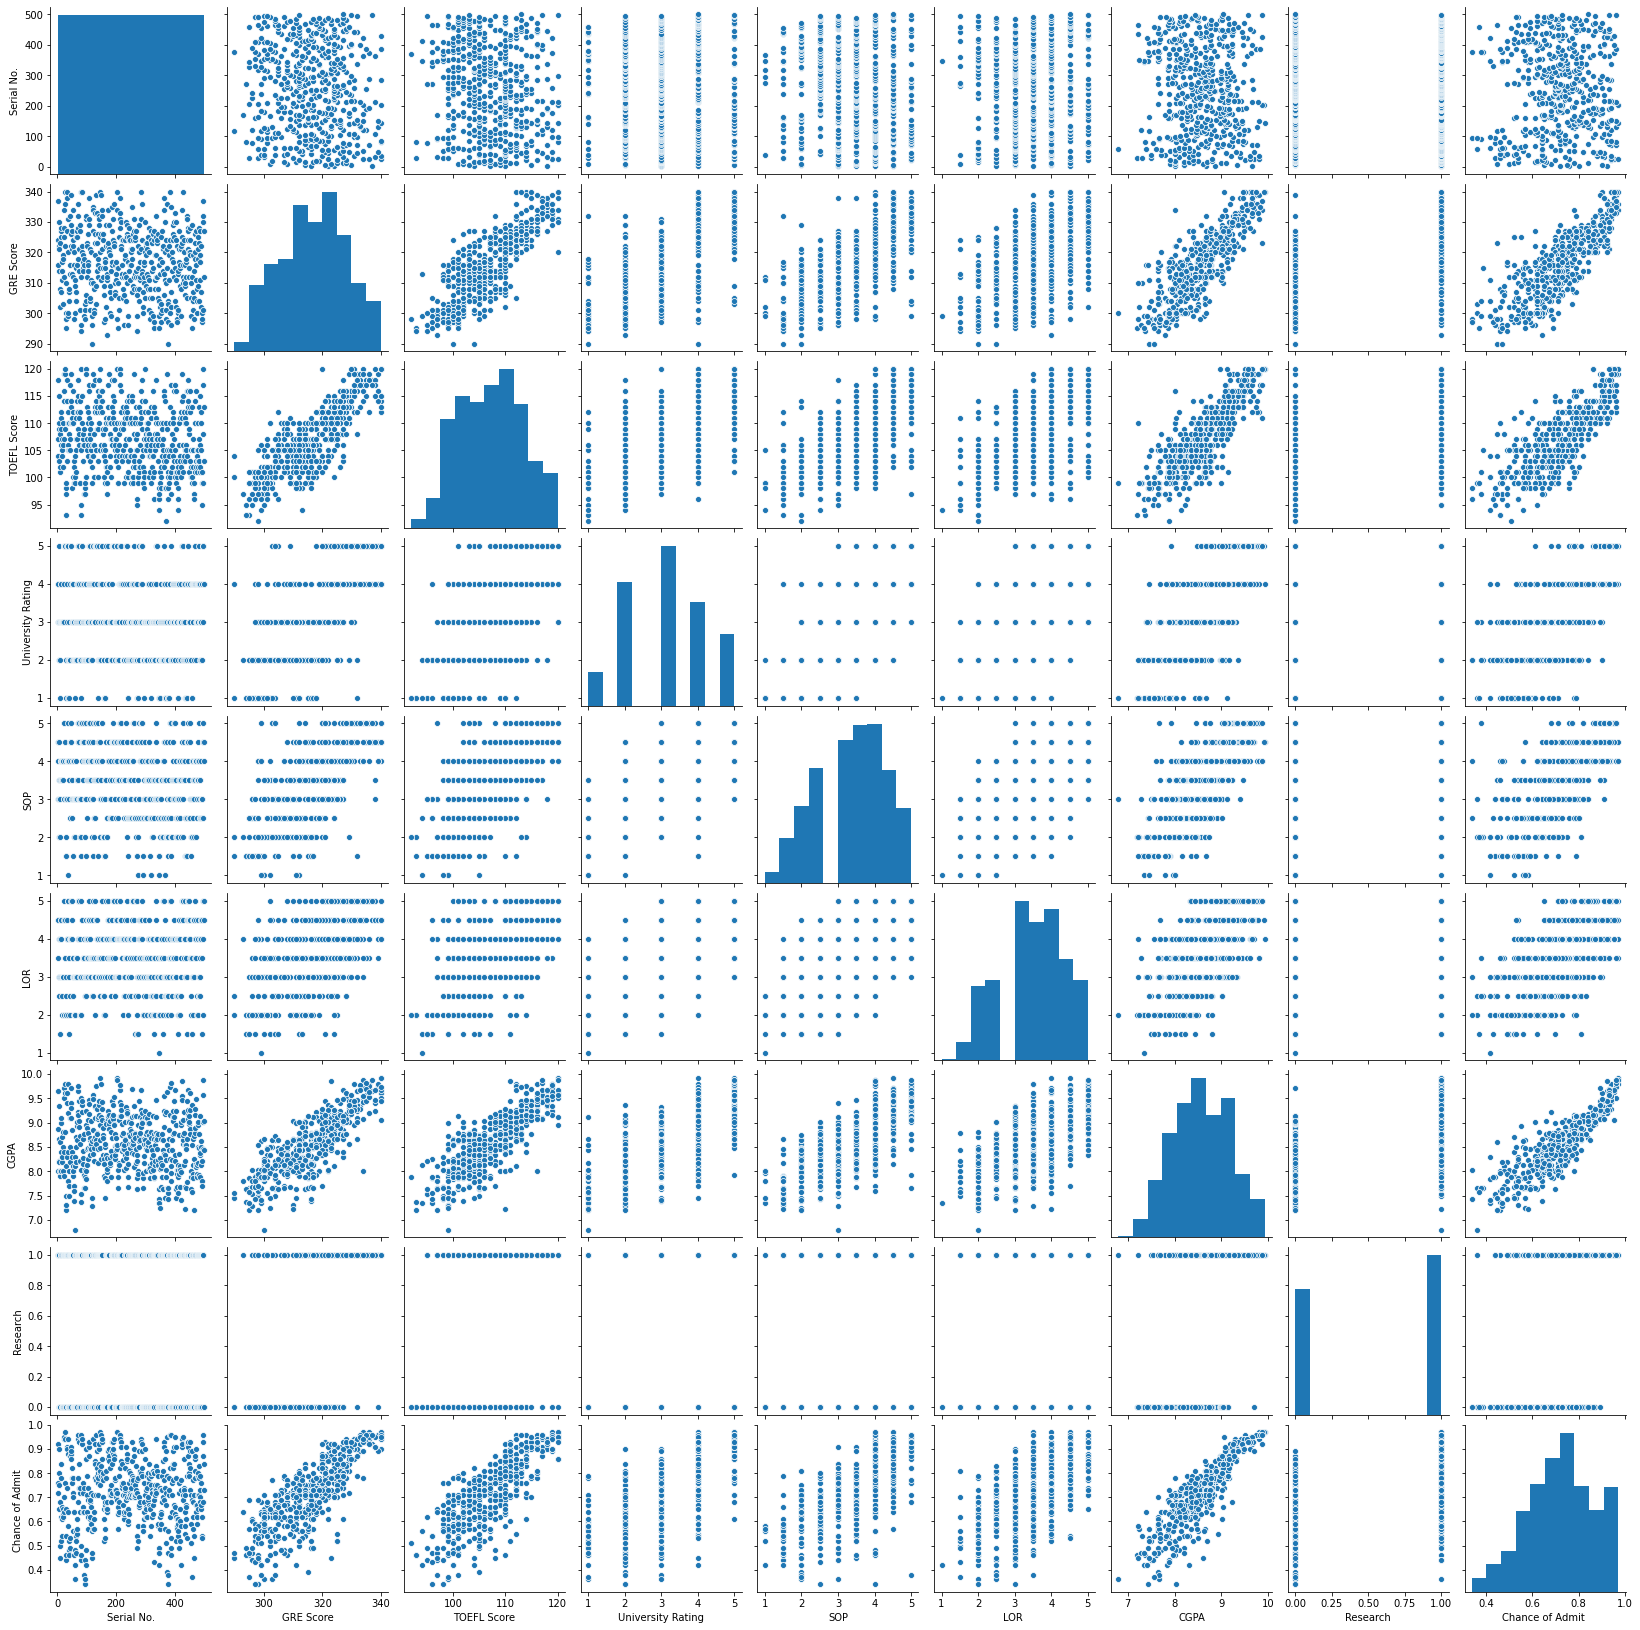

In [4]:
sns.pairplot(df)

In [5]:
for c in list(df.columns):
  print("Column Name :", c)
  print(df[c].value_counts().count())

Column Name : Serial No.
500
Column Name : GRE Score
49
Column Name : TOEFL Score
29
Column Name : University Rating
5
Column Name : SOP
9
Column Name : LOR 
9
Column Name : CGPA
184
Column Name : Research
2
Column Name : Chance of Admit 
61


Above step we find out that apart from **Serial No. and Chance of Admit**  The key important features are **GRE Scores, TOEFL Scores and CGPA**

Below we show the highest correlation between **each column** to the column **Chance of Admit**, which os our focus.

In [6]:
cm = sns.light_palette("red", as_cmap=True)
corr_heat = df.corr().style.background_gradient(cmap=cm)
corr_heat

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [7]:
df.corr()["Chance of Admit "].sort_values(ascending=False)[1:][:-1]

CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance of Admit , dtype: float64

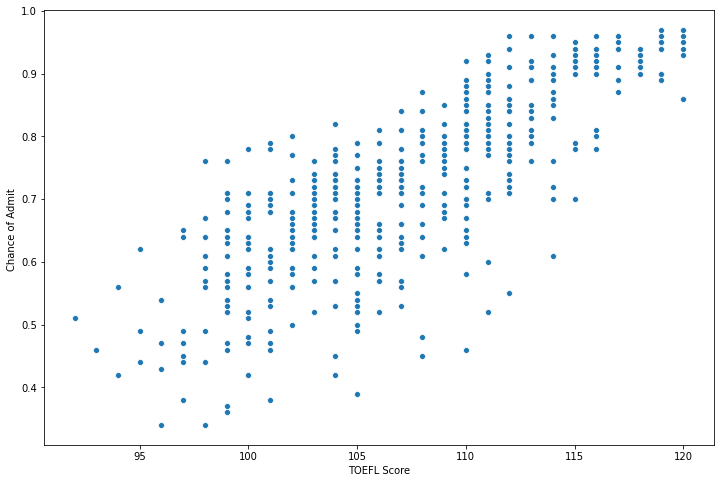

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='TOEFL Score',y='Chance of Admit ',data=df)

TRAIN TEST SPLITTING OF DATA


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
def split(df1):
  X=df1.drop(['Serial No.','Chance of Admit '],axis=1)
  y=df1['Chance of Admit ']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train,X_test,y_train,y_test

In [0]:
X_train,X_test,y_train,y_test = split(df)


In [0]:
y_test=y_test.reset_index(drop=True)

SCALING THE VALUES INTO THE MODEL

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
#help(MinMaxScaler)

In [0]:

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


CREATING MODEL

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:

model = Sequential()

model.add(Dense(14,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1)) #output layer

model.compile(optimizer='rmsprop',loss='mse')

In [18]:
np.random.seed(42)
model.fit(x=X_train,y=y_train,epochs=250,verbose=2,shuffle=False,validation_split=0.2) #fitting the model with the data.

Epoch 1/250

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

10/10 - 0s - loss: 0.8499 - val_loss: 0.7751
Epoch 2/250
10/10 - 0s - loss: 0.6454 - val_loss: 0.6226
Epoch 3/250
10/10 - 0s - loss: 0.5334 - val_loss: 0.5215
Epoch 4/250
10/10 - 0s - loss: 0.4574 - val_loss: 0.4502
Epoch 5/250
10/10 - 0s - loss: 0.3962 - val_loss: 0.3896
Epoch 6/250
10/10 - 0s - loss: 0.3342 - val_loss: 0.3356
Epoch 7/250
10/10 - 0s - loss: 0.2699 - val_loss: 0.2726
Epoch 8/250
10/10 - 0s - loss: 0.2076 - val_loss: 0.2185
Epoch 9/250
10/10 - 0s - loss: 0.1575 - val_loss: 0.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  112       
_________________________________________________________________
dense_1 (Dense)              multiple                  105       
_________________________________________________________________
dense_2 (Dense)              multiple                  112       
_________________________________________________________________
dense_3 (Dense)              multiple                  15        
Total params: 344
Trainable params: 344
Non-trainable params: 0
_________________________________________________________________


In [30]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()
plt.show
plt.savefig('books_read.png')

TypeError: ignored

MODEL PREDICTION


In [0]:
test_predictions =model.predict(X_test)

In [0]:
test_predictions= pd.Series(test_predictions.reshape(100,))

In [0]:
pred_df = pd.DataFrame(y_test)

In [0]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [0]:
pred_df.columns = ['Test True Y','Model Predictions'] #dataframe to plot real output vs predicted output

In [26]:
pred_df

,Test True Y,Model Predictions
0,0.93,0.923877
1,0.84,0.814505
2,0.39,0.614364
3,0.77,0.718159
4,0.74,0.825483
...,...,...
95,0.42,0.385217
96,0.72,0.698758
97,0.72,0.768188
98,0.67,0.713898


<function seaborn.relational.scatterplot>

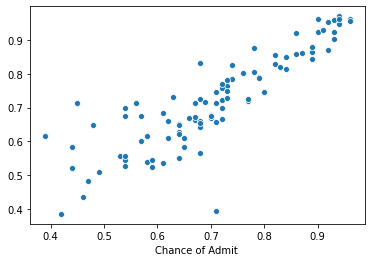

In [27]:
sns.scatterplot(x=y_test,y=test_predictions)
sns.scatterplot

INDIVIDUAL MODEL PREDICTOR FOR USERS

In [28]:
gre=float(input("Enter marks in GRE out of 340\n"))
toe=float(input("\nEnter marks in TOEFL out of 120\n"))
univr=float(input("\nEnter University Rating out of 5\n"))
sop=float(input("\nEnter SOP rating out of 5\n"))
lor=float(input("\nEnter LOR rating out of 5\n"))
cgpa=float(input("\nEnter CGPA out of 10\n"))
r=float(input("\nEnter 1 if you have Research Experience and 0 for no Research Experience\n"))

Enter marks in GRE out of 340
300

Enter marks in TOEFL out of 120
112

Enter University Rating out of 5
3

Enter SOP rating out of 5
4

Enter LOR rating out of 5
4

Enter CGPA out of 10
9.5

Enter 1 if you have Research Experience and 0 for no Research Experience
1


In [29]:
new_score=[[gre,toe,univr,sop,lor,cgpa,r]]

new_score=scaler.transform(new_score)
pred=model.predict(new_score)
print(pred[0,0]*100)

86.66580319404602
